In [1]:
#f(x1,x2)=2(x1-2)**2+(x2-3)**2
import numpy as np
import torch as t
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from d2l import torch as d2l
import torch.nn as nn
import time

In [ ]:
#import matplotlib      
#matplotlib.use('Agg')

In [2]:
def f(x1,x2):
    return 2*(x1-2)**2+(x2-3)**2

def x_grad_function(x1,x2,r):
    return (2*math.gamma(3)*(x1-2)**(2-r)/math.gamma(3-r), math.gamma(3)*(x2-3)**(2-r)/math.gamma(3-r))

def x_grad_function_fabs(x1,x2,r):
    return (2*math.gamma(3)*np.fabs((x1-2))**(2-r)/math.gamma(3-r), math.gamma(3)*np.fabs((x2-3))**(2-r)/math.gamma(3-r))

In [4]:
range_size = 15
def vfosgd_pf(lr, xf,x1,x2):
    results1,results2 = [x1],[x2]
    for i in range(range_size):
        x1_grad,x2_grad = xf(x1,x2,alpha)
        x1_grad_1,x2_grad_1 = xf(x1,x2,1)   #1_order about x1 and x2
        if x1>=2:
            x1 -= lr * x1_grad
            #print('is')
        else:
            x1 -= lr * x1_grad_1
            #print('no')
        results1.append(float(x1))
        if x2>=3:
            x2 -= lr * x2_grad
            #print('is')
        else:
            x2 -= lr * x2_grad_1
            #print('no')
        results2.append(float(x2))
    return results1,results2

In [5]:
lr = 0.1     #learning rate

#(-1,-1)
x1,x2 = -1,-1  #initialization value
alpha = 1.4   #fractional order
resultf11_4 = vfosgd_pf(lr, x_grad_function,x1,x2)

alpha = 1.2   #fractional order
resultf11_2 = vfosgd_pf(lr, x_grad_function,x1,x2)
#esultf1_2 = ifosgd_pf(lr, x_grad_function,x_grad_function_fabs)

alpha = 1.0   #fractional order
resultf11_0 = vfosgd_pf(lr, x_grad_function,x1,x2)

alpha = 0.8   #fractional order
resultf10_8 = vfosgd_pf(lr, x_grad_function,x1,x2)

#(-1,5)
x1,x2 = -1,5  #initialization value
alpha = 1.4   #fractional order
resultf21_4 = vfosgd_pf(lr, x_grad_function,x1,x2)

alpha = 1.2   #fractional order
resultf21_2 = vfosgd_pf(lr, x_grad_function,x1,x2)
#esultf1_2 = ifosgd_pf(lr, x_grad_function,x_grad_function_fabs)

alpha = 1.0   #fractional order
resultf21_0 = vfosgd_pf(lr, x_grad_function,x1,x2)

alpha = 0.8   #fractional order
resultf20_8 = vfosgd_pf(lr, x_grad_function,x1,x2)

#(4,-1)
x1,x2 = 4,-1  #initialization value
alpha = 1.4   #fractional order
resultf31_4 = vfosgd_pf(lr, x_grad_function,x1,x2)

alpha = 1.2   #fractional order
resultf31_2 = vfosgd_pf(lr, x_grad_function,x1,x2)
#esultf1_2 = ifosgd_pf(lr, x_grad_function,x_grad_function_fabs)

alpha = 1.0   #fractional order
resultf31_0 = vfosgd_pf(lr, x_grad_function,x1,x2)

alpha = 0.8   #fractional order
resultf30_8 = vfosgd_pf(lr, x_grad_function,x1,x2)

#(4,3)
x1,x2 = 4,3  #initialization value
alpha = 1.4   #fractional order
resultf41_4 = vfosgd_pf(lr, x_grad_function,x1,x2)

alpha = 1.2   #fractional order
resultf41_2 = vfosgd_pf(lr, x_grad_function,x1,x2)
#esultf1_2 = ifosgd_pf(lr, x_grad_function,x_grad_function_fabs)

alpha = 1.0   #fractional order
resultf41_0 = vfosgd_pf(lr, x_grad_function,x1,x2)

alpha = 0.8   #fractional order
resultf40_8 = vfosgd_pf(lr, x_grad_function,x1,x2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


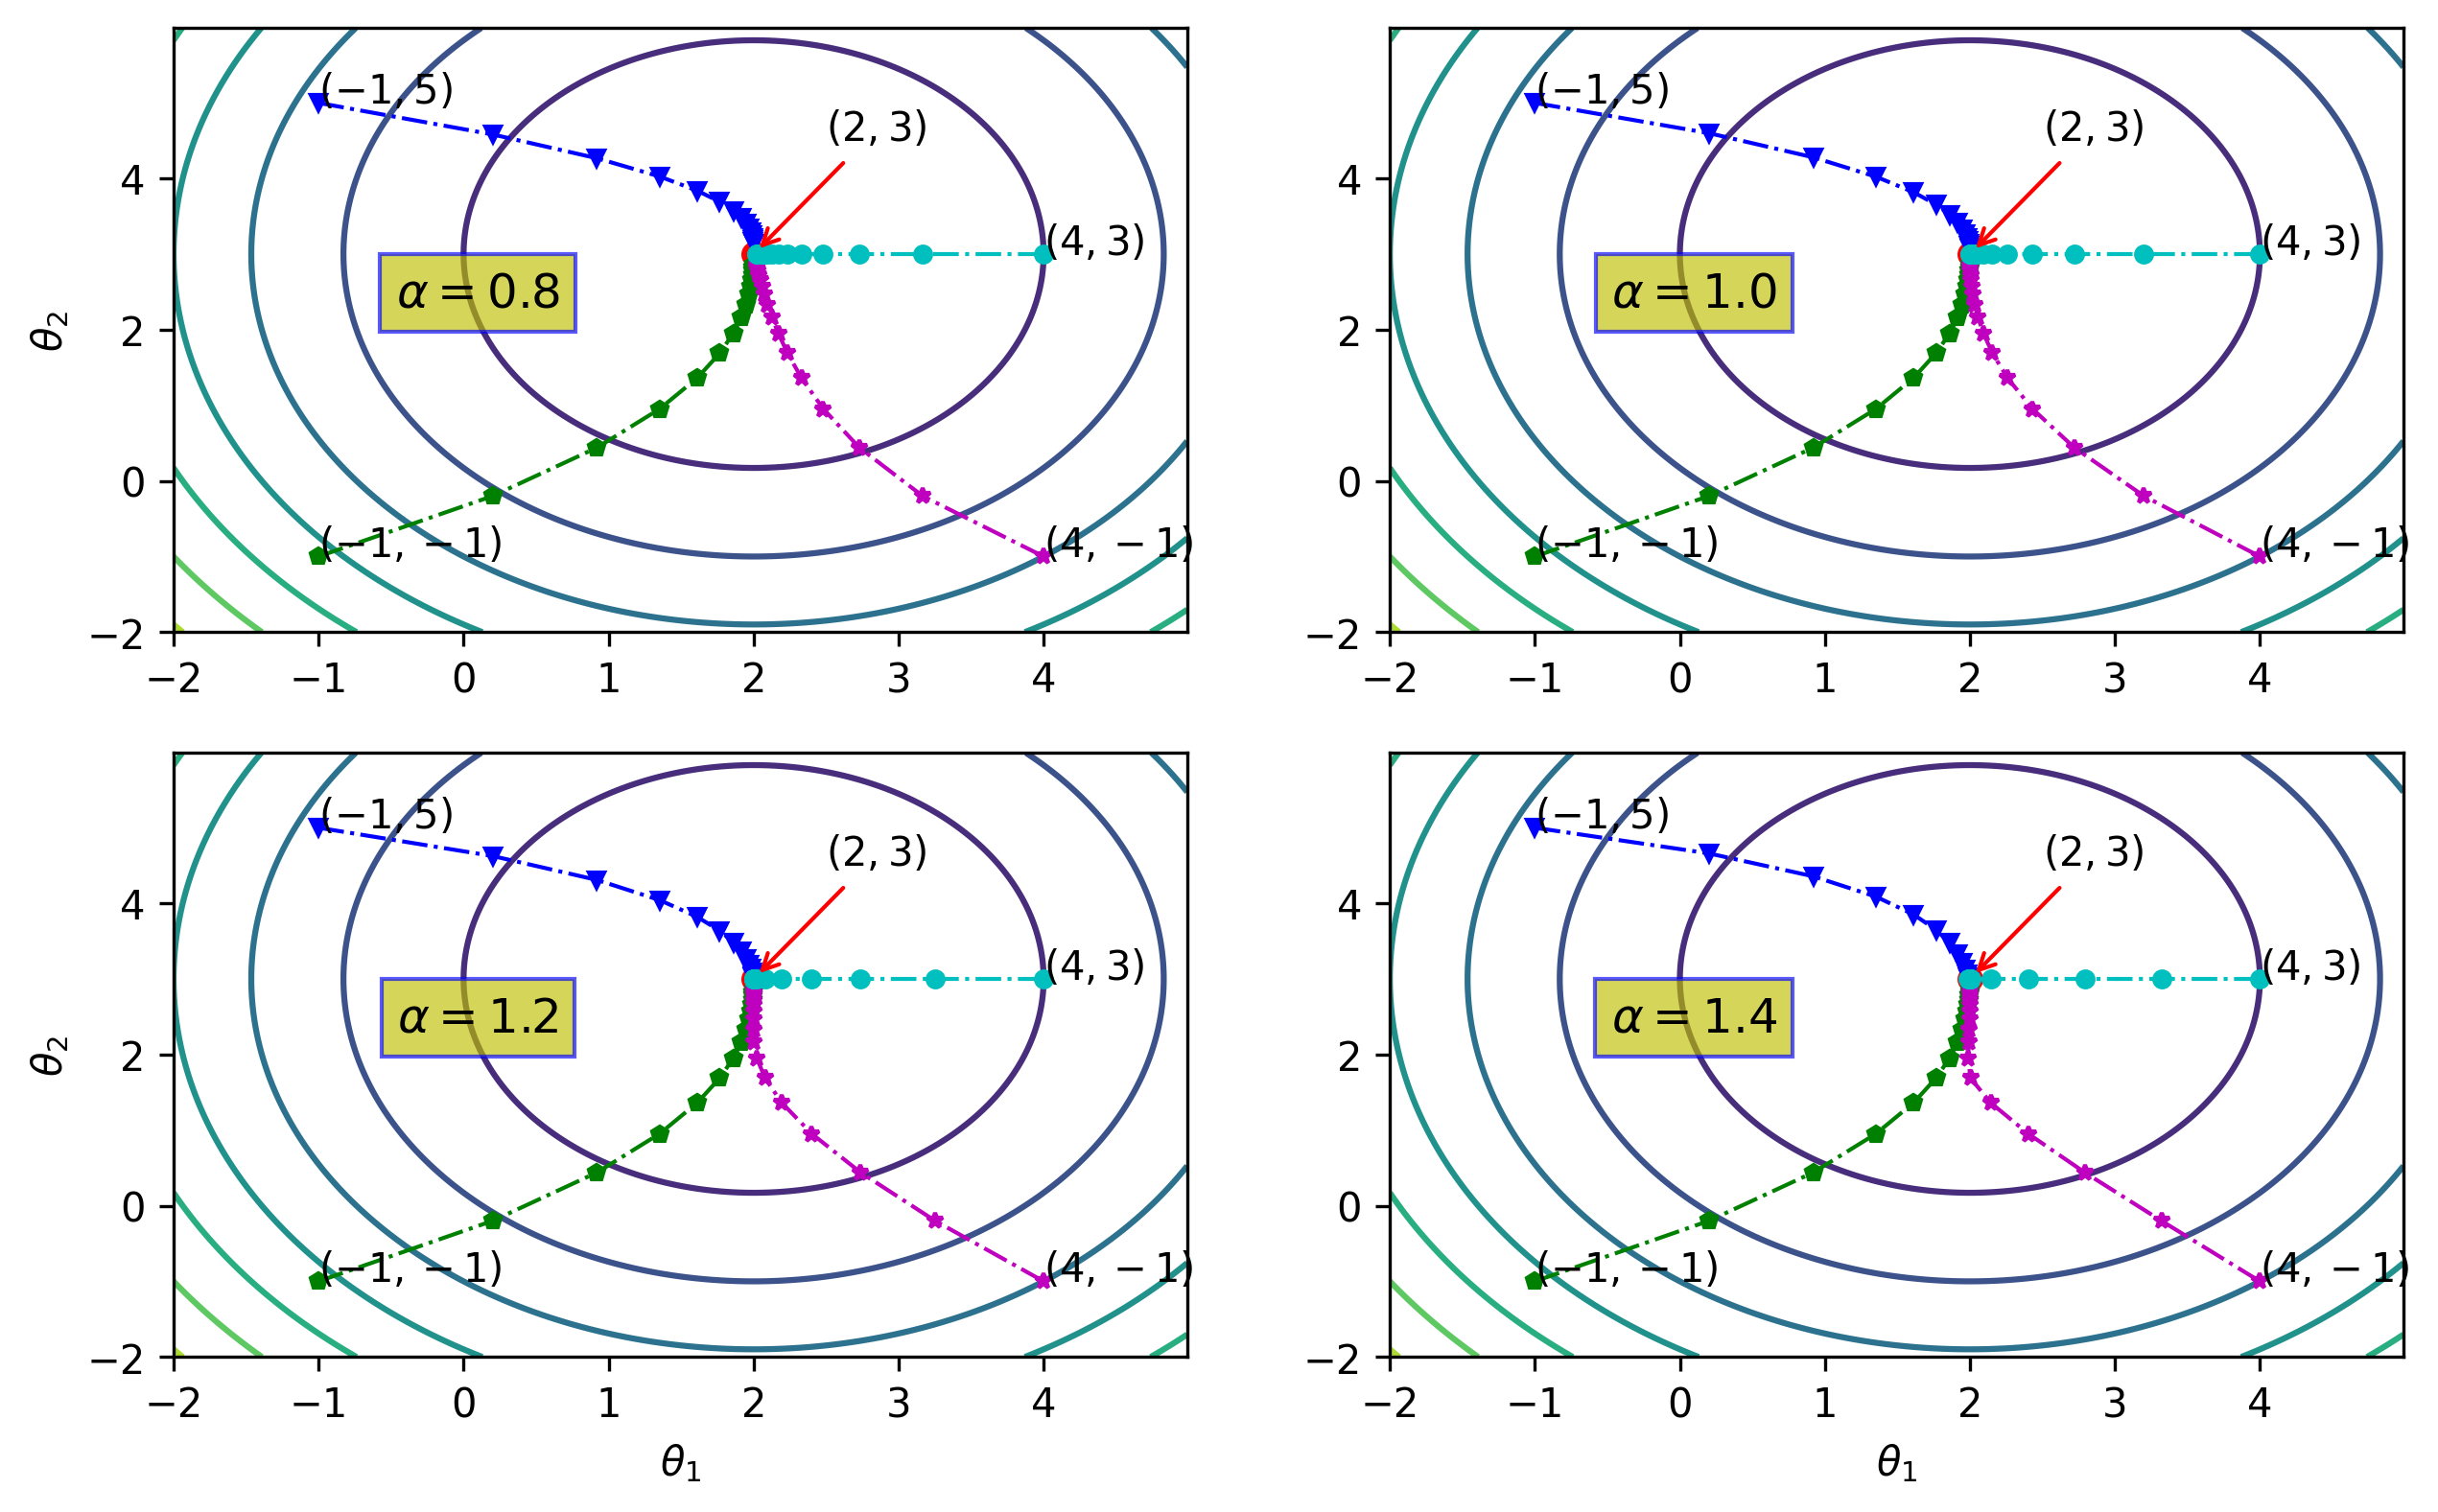

In [15]:
#Fig4,vfosgd_pf
fig = plt.figure(figsize=(10,6),dpi=300)
step = 0.01
x = np.arange(-2,5,step)
y = np.arange(-2,6,step)
X,Y = np.meshgrid(x,y)
Z = 2*(X-2)**2+(Y-3)**2

ax1 = fig.add_subplot(2, 2, 1)
ax1.contour(X,Y,Z)
ax1.annotate(r'$(2,3)$', xy=(2,3), xytext=(2.5,4.5),
             arrowprops=dict(color='red',arrowstyle="->",connectionstyle="arc3"))
             #arrowprops=dict(facecolor='red', shrink=0.05))
ax1.scatter(2,3,c='red',s=30)
x1,x2 = resultf10_8
ax1.annotate(r'$( - 1, - 1)$', xy=(-1,-1))
ax1.plot(x1,x2,'g-.p',markersize='4',linewidth ='1')
x1,x2 = resultf20_8
ax1.annotate(r'$( - 1,5)$', xy=(-1,5))
ax1.plot(x1,x2,'b-.v',markersize='4',linewidth ='1')
x1,x2 = resultf30_8
ax1.annotate(r'$(4, - 1)$', xy=(4,-1))
ax1.plot(x1,x2,'m-.*',markersize='4',linewidth ='1')
x1,x2 = resultf40_8
ax1.annotate(r'$(4,3)$', xy=(4,3))
ax1.plot(x1,x2,'c-.o',markersize='4',linewidth ='1')
#ax1.set_xlabel(r'${\theta _1}$')
ax1.set_ylabel(r'${\theta _2}$')
ax1.set_title(r'$\alpha  = 0.8$',bbox=dict(facecolor='y', edgecolor='blue', alpha=0.65 ),x=0.3,y=0.5)

ax2 = fig.add_subplot(2, 2, 2)
ax2.contour(X,Y,Z)
ax2.annotate(r'$(2,3)$', xy=(2,3), xytext=(2.5,4.5),
             arrowprops=dict(color='red',arrowstyle="->",connectionstyle="arc3"))
             #arrowprops=dict(facecolor='red', shrink=0.05))
ax2.scatter(2,3,c='red',s=30)
x1,x2 = resultf11_0
ax2.annotate(r'$( - 1, - 1)$', xy=(-1,-1))
ax2.plot(x1,x2,'g-.p',markersize='4',linewidth ='1')
x1,x2 = resultf21_0
ax2.annotate(r'$( - 1,5)$', xy=(-1,5))
ax2.plot(x1,x2,'b-.v',markersize='4',linewidth ='1')
x1,x2 = resultf31_0
ax2.annotate(r'$(4, - 1)$', xy=(4,-1))
ax2.plot(x1,x2,'m-.*',markersize='4',linewidth ='1')
x1,x2 = resultf41_0
ax2.annotate(r'$(4,3)$', xy=(4,3))
ax2.plot(x1,x2,'c-.o',markersize='4',linewidth ='1')
#ax2.set_xlabel(r'${\theta _1}$')
#ax2.set_ylabel(r'${\theta _2}$')
ax2.set_title(r'$\alpha  = 1.0$',bbox=dict(facecolor='y', edgecolor='blue', alpha=0.65 ),x=0.3,y=0.5)

ax3 = fig.add_subplot(2, 2, 3)
ax3.contour(X,Y,Z)
ax3.annotate(r'$(2,3)$', xy=(2,3), xytext=(2.5,4.5),
             arrowprops=dict(color='red',arrowstyle="->",connectionstyle="arc3"))
             #arrowprops=dict(facecolor='red', shrink=0.05))
ax3.scatter(2,3,c='red',s=30)
x1,x2 = resultf11_2
ax3.annotate(r'$( - 1, - 1)$', xy=(-1,-1))
ax3.plot(x1,x2,'g-.p',markersize='4',linewidth ='1')
x1,x2 = resultf21_2
ax3.annotate(r'$( - 1,5)$', xy=(-1,5))
ax3.plot(x1,x2,'b-.v',markersize='4',linewidth ='1')
x1,x2 = resultf31_2
ax3.annotate(r'$(4, - 1)$', xy=(4,-1))
ax3.plot(x1,x2,'m-.*',markersize='4',linewidth ='1')
x1,x2 = resultf41_2
ax3.annotate(r'$(4,3)$', xy=(4,3))
ax3.plot(x1,x2,'c-.o',markersize='4',linewidth ='1')
ax3.set_xlabel(r'${\theta _1}$')
ax3.set_ylabel(r'${\theta _2}$')
ax3.set_title(r'$\alpha  = 1.2$',bbox=dict(facecolor='y', edgecolor='blue', alpha=0.65 ),x=0.3,y=0.5)

ax4 = fig.add_subplot(2, 2, 4)
ax4.contour(X,Y,Z)
ax4.annotate(r'$(2,3)$', xy=(2,3), xytext=(2.5,4.5),
             arrowprops=dict(color='red',arrowstyle="->",connectionstyle="arc3"))
             #arrowprops=dict(facecolor='red', shrink=0.05))
ax4.scatter(2,3,c='red',s=30)
x1,x2 = resultf11_4
ax4.annotate(r'$( - 1, - 1)$', xy=(-1,-1))
ax4.plot(x1,x2,'g-.p',markersize='4',linewidth ='1')
x1,x2 = resultf21_4
ax4.annotate(r'$( - 1,5)$', xy=(-1,5))
ax4.plot(x1,x2,'b-.v',markersize='4',linewidth ='1')
x1,x2 = resultf31_4
ax4.annotate(r'$(4, - 1)$', xy=(4,-1))
ax4.plot(x1,x2,'m-.*',markersize='4',linewidth ='1')
x1,x2 = resultf41_4
ax4.annotate(r'$(4,3)$', xy=(4,3))
ax4.plot(x1,x2,'c-.o',markersize='4',linewidth ='1')
ax4.set_xlabel(r'${\theta _1}$')
#ax4.set_ylabel(r'${\theta _2}$')
ax4.set_title(r'$\alpha  = 1.4$',bbox=dict(facecolor='y', edgecolor='blue', alpha=0.65 ),x=0.3,y=0.5)

plt.savefig('picture/Fig4.eps',bbox_inches='tight',format='eps')
plt.savefig('picture/Fig4.svg',bbox_inches='tight',format='svg')
plt.savefig('picture/Fig4.pdf',bbox_inches='tight',format='pdf')
plt.show()